Loading libraries

In [0]:
#################################################################
#MultilayerPerceptron with keras
#Author: Edwyn Javier Aldana
################################################################
#Load libraries
#######################################################################################
#                           TensorFlow and tf.keras
#######################################################################################
import tensorflow as tf
from tensorflow import keras
#######################################################################################
#                              Other libraries
#######################################################################################
import numpy as np
import matplotlib.pyplot as plt

Getting dataset, in this case, we use an standard dataset from NIST

In [0]:
#Load dataset
#######################################################################################
#                                     Get data images
#######################################################################################
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

Exploring the dataset: We show a sample of training dataset and present some properties of traning and test dataset.

(60000, 28, 28)
(10000, 28, 28)


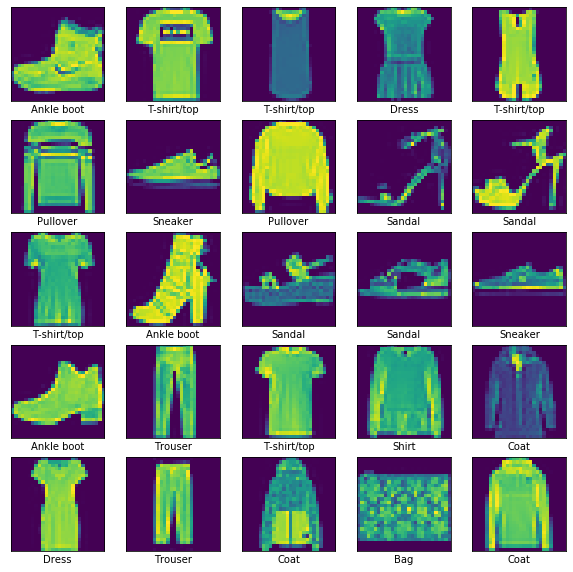

In [0]:
#Explore data images
#Mapping the label number to the following text labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
#Datasets cardinality
print(train_images.shape) #60000 images with size of 28x28 pixel
print(test_images.shape) #10000 images with size of 28x28 pixel


Pre-processing dataset

In [0]:
#Scaling  images between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

Building a neural network

In [0]:
#Define the network architecture: 1) Input, Hidden and Output.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training process

In [0]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.5006 - acc: 0.8230
Epoch 2/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3760 - acc: 0.8654
Epoch 3/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3364 - acc: 0.8783
Epoch 4/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3125 - acc: 0.8855
Epoch 5/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2937 - acc: 0.8922


Testing process

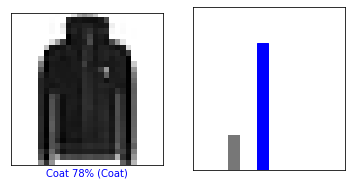

In [0]:
predictions = model.predict(test_images)
id_image=315
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(id_image, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(id_image, predictions,  test_labels)



Function to display predictions

In [0]:
#Utilitary functions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

